In [65]:
import pandas as pd
import numpy as np
data = pd.read_csv('/home/jefferyjapheth/Desktop/devsuite/hello_ds/data/external/titanic3.csv')

In [66]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

<Axes: xlabel='survived', ylabel='fare'>

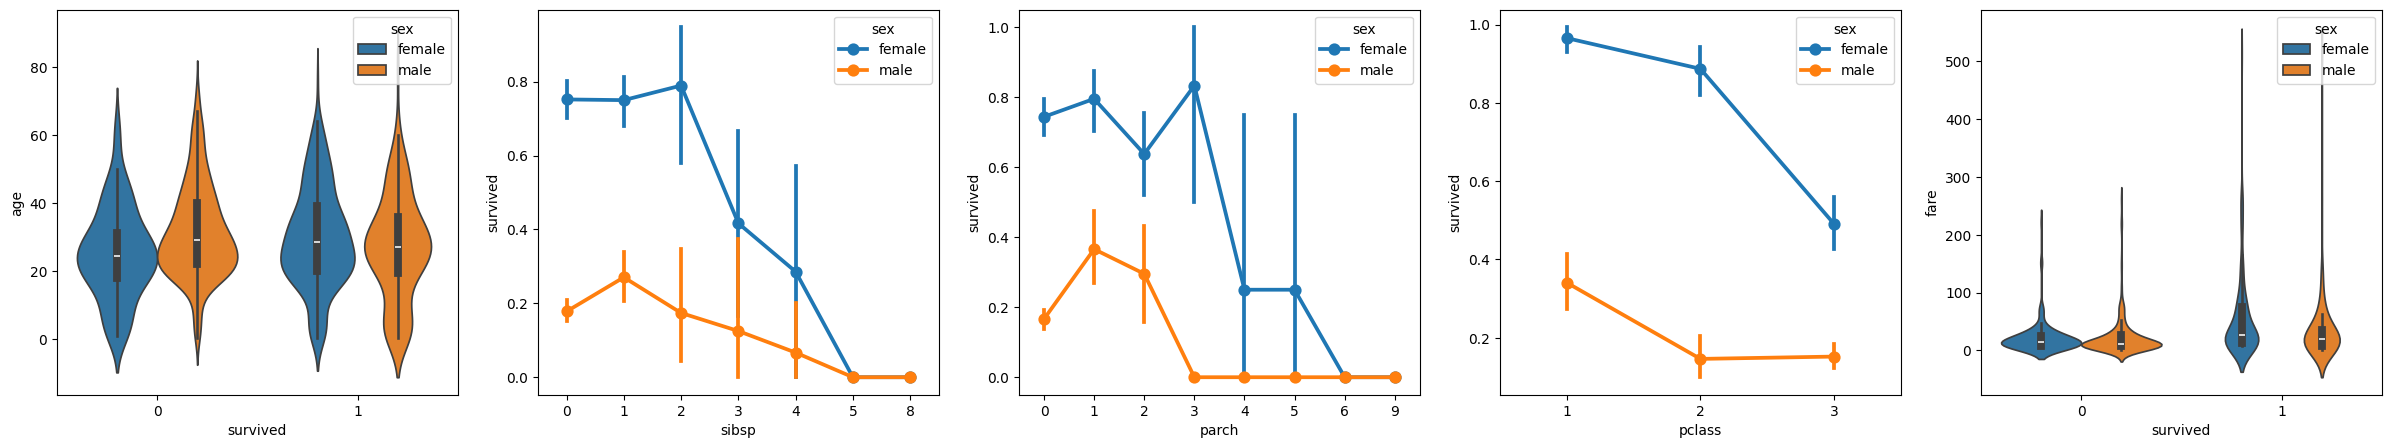

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [68]:
data.replace({'male': 1, 'female': 0}, inplace=True)


In [69]:
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [70]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]]


,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [71]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)


In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [74]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [75]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))


0.7464114832535885


In [76]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [77]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [78]:
model.summary()
#this is model summary

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 5)                 30        
                                                                 
 dense_13 (Dense)            (None, 5)                 30        
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 66 (264.00 Byte)
Trainable params: 66 (264.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=100)


Epoch 1/100


27/27 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.5622
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5861
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.5957
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.7392
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.7656
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.7667
Epoch 7/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.7691
Epoch 8/100
27/27 [==============================] - 0s 2ms/step - loss: 0.6181 - accuracy: 0.7775
Epoch 9/100
27/27 [==============================] - 0s 1ms/step - loss: 0.6022 - accuracy: 0.7775
Epoch 10/100
27/27 [==============================] - 0s 2ms/step - loss: 0.5896 - accuracy: 0.7751
Epoch 11/100
27/27 [=

In [80]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))


7/7 [==============================] - 0s 1ms/step
0.8038277511961722
